In [1]:
from lusidtools.jupyter_tools import toggle_code

"""Aggregated Performance Returns

Demonstrates different performance returns metric types when getting aggregated returns for a portfolio. 

Attributes
----------
performance returns
portfolios"""

toggle_code("Toggle Docstring")

# Aggregated Performance Returns


## Table of contents
1. [Overview](#1.-Overview)
2. [Setup](#2.-Setup)
3. [Load Returns data into LUSID](#3.-Load-Returns-data-into-LUSID)
4. [Get Aggregated Returns with different Performance Returns Metric Types](#4.-Examine-Aggregated-Returns-with-different-Performance-Returns-Metric-Types)
   * [4.1 Get Portfolio Returns by Aggregation](#4.1-Get-Portfolio-Returns-by-Aggregation)
   * [4.2 Get Portfolio Returns by Volatility](#4.2-Get-Portfolio-Returns-by-Volatility)
5. [Plot and Examine Returns Result](#5.-Plot-and-Examine-Returns-Result)
6. [Dispersion](#7.-Dispersion)
7. [Data Cleanup](#7.-Data-Cleanup)

## 1. Overview

LUSID offers a set of endpoints for users to set performance returns to transaction portfolios. 

This notebook demonstrates 
* How performance returns can be set on a Transaction Portfolio, and
* How to use "Return" and "Volatility" Performance Returns Metric Types to calculate returns values. 

## 2. Setup

This section consists of imports and notebook environment setup.

In [2]:
# Import general purpose packages
import os
import json
import pandas as pd
import numpy as np
import datetime
import pytz
import warnings

warnings.filterwarnings("ignore", module="matplotlib*")

import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from pandas import json_normalize

# Import lusid specific packages
import lusid
import lusid.models as models

from lusid.utilities import ApiClientFactory
from lusidjam.refreshing_token import RefreshingToken

from lusidtools.pandas_utils.lusid_pandas import lusid_response_to_data_frame

# Authenticate our user and create our API client
secrets_path = os.getenv("FBN_SECRETS_PATH")

# Initiate an API Factory which is the client side object for interacting with LUSID APIs
api_factory = lusid.utilities.ApiClientFactory(
    token=RefreshingToken(),
    api_secrets_filename=secrets_path,
    app_name="LusidJupyterNotebook",
)

In this notebook, we will use Pandas to plot graphs to display performance returns. Below are some settings in preparation for that.

In [3]:
# Set display configuration
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.5f" % x)
pd.set_option("display.max_rows", 3500)
pd.set_option("max_colwidth", 20)

# Use line magic function to enable matplotlib to work interactively with iPython
%matplotlib inline

# Set style to fivethirtyeight to create clean and clear looking graphs
plt.style.use("fivethirtyeight")

# Define a dictionary containing default plotting configurations
params = {
    "legend.fontsize": "small",
    "figure.figsize": (12, 4.5),
    "axes.labelsize": "small",
    "axes.titlesize": "medium",
    "xtick.labelsize": "small",
    "ytick.labelsize": "small",
}

plt.rcParams.update(params)

This section declares APIs which will be used throughout the notebook.

In [4]:
# Define the APIs used within this notebook
transaction_portfolios_api = api_factory.build(lusid.api.TransactionPortfoliosApi)
portfolios_api = api_factory.build(lusid.api.PortfoliosApi)

This section defines variables used throughout the notebook.

In [5]:
# Define a scope to create portfolio and hold returns data
scope = "aggregated-returns"
portfolio_code = "returns-example"
return_code = "returns"

# Define dates
start_date = datetime(year=2017, month=1, day=1, tzinfo=pytz.UTC)

## 3. Load Returns data into LUSID

In this section, we will read Returns data from CSV file and upsert into the portfolio created previously.

First, create a portfolio of which its Returns data will be upserted later.

In [6]:
try:
    response = transaction_portfolios_api.create_portfolio(
        scope=scope,
        create_transaction_portfolio_request=models.CreateTransactionPortfolioRequest(
        display_name=portfolio_code,
            code=portfolio_code,
            created=start_date,
            base_currency="GBP"),
    )
except lusid.ApiException as e:
    print(e.body)

Next, load performance data to DataFrame.

In [7]:
returns_df = pd.read_csv("data/performance_data_for_metric_types.csv")
returns_df["date"] = pd.to_datetime(returns_df["date"])
returns_df = returns_df.rename(
    columns={
        "market_value": "market_value",
        "returns": "returns"
    }
)

display(returns_df)

,date,market_value,returns
0,2022-03-31,60,-0.02878
1,2022-02-28,59,-0.08693
2,2022-01-31,58,-0.05853
3,2021-12-31,57,0.10574
4,2021-11-30,56,0.11602
5,2021-10-31,55,0.08418
6,2021-09-30,54,0.07128
7,2021-08-31,53,0.07987
8,2021-07-31,52,-0.14248
9,2021-06-30,51,-0.11691


Next, convert the Returns data into PerformanceReturn LUSID model.

In [8]:
time_series_of_returns = [
    models.PerformanceReturn(
        effective_at=row["date"].isoformat()[:10],
        rate_of_return=row["returns"],
        closing_market_value=row["market_value"],
        period="Monthly",
    )
    for _, row in returns_df.iterrows()
]

lusid_response_to_data_frame(
    time_series_of_returns)

,effective_at,rate_of_return,closing_market_value,period
0,2022-03-31,-0.02878,60,Monthly
1,2022-02-28,-0.08693,59,Monthly
2,2022-01-31,-0.05853,58,Monthly
3,2021-12-31,0.10574,57,Monthly
4,2021-11-30,0.11602,56,Monthly
5,2021-10-31,0.08418,55,Monthly
6,2021-09-30,0.07128,54,Monthly
7,2021-08-31,0.07987,53,Monthly
8,2021-07-31,-0.14248,52,Monthly
9,2021-06-30,-0.11691,51,Monthly


After that, we will upsert them to the portfolio

In [9]:
upsert_returns_response = portfolios_api.upsert_portfolio_returns(
    scope=scope,
    code=portfolio_code,
    return_scope=scope,
    return_code=return_code,
    performance_return=time_series_of_returns,
)

## 4. Get Aggregated Returns with different Performance Returns Metric Types

In this section, we examine the different types of performance returns available. 

The below code is to extract the performance returns response into a suitable DataFrame object for later use.

In [10]:
def extract_performance_returns_data(
    performance_returns_response,
    returns_column_name
):
    extracted_returns_result = {}

    for data in performance_returns_response.results[(scope + "/" + return_code)]:
        extracted_returns_result[data.effective_at] = data.metrics_value

    extracted_returns_df = pd.DataFrame.from_dict(
    {
        "date": extracted_returns_result.keys(),
        "metrics": extracted_returns_result.values()
    })

    returns_summary_df = pd.DataFrame(
        columns=[
            "date",
            returns_column_name
        ])

    for index, return_value in extracted_returns_df.iterrows():
        if (returns_column_name in return_value['metrics']):
            row = {}
            row["date"] = return_value['date'].strftime(format="%Y-%m-%d")
            ## note: the below is x100 to reflect returns as percentage
            row[returns_column_name] = return_value['metrics'][returns_column_name] * 100
            returns_summary_df = returns_summary_df.append(row, ignore_index=True)

    returns_summary_df.set_index(['date'], inplace=True)
    
    return returns_summary_df

### 4.1 Get Portfolio Returns by Aggregation

First, we get portfolio aggregated returns using MetricType "Return" within a 3Y window and with a monthly period.

In [11]:
try:
    aggregated_returns_with_return_response = portfolios_api.get_portfolio_aggregated_returns(
        scope=scope,
        code=portfolio_code,
        from_effective_at=start_date,
        to_effective_at="2022-04-30",
        aggregated_returns_request=models.AggregatedReturnsRequest(     
            metrics=[
                models.PerformanceReturnsMetric(
                    type="Return",
                    window="3Y",
                    alias="3Y-Aggregated",
                    annualised=True)
            ],
            period="Monthly",
            return_ids=[
                models.ResourceId(
                    scope=scope,
                    code=return_code
                )
            ]
        ))

except lusid.ApiException as e:
    print(e)

aggregated_returns_summary_df=extract_performance_returns_data(
    aggregated_returns_with_return_response,
    "3Y-Aggregated")

display(aggregated_returns_summary_df)

,3Y-Aggregated
date,
2020-04-30,-16.90151
2020-05-31,-16.86662
2020-06-30,-12.12099
2020-07-31,-10.50523
2020-08-31,-9.18588
2020-09-30,-9.64858
2020-10-31,-11.81124
2020-11-30,-13.46606
2020-12-31,-10.10944


### 4.2 Get Portfolio Returns by Volatility

Next, we get portfolio aggregated returns using MetricType "Volatility" within a 3Y window and with a monthly period. The alias "3Y-Volatiliy" here is to provide the lookup key to retrieve the relevant returns value in the response.

In [12]:
try:
    aggregated_returns_with_volatility_response = portfolios_api.get_portfolio_aggregated_returns(
        scope=scope,
        code=portfolio_code,
        from_effective_at=start_date,
        to_effective_at="2022-04-30",
        aggregated_returns_request=models.AggregatedReturnsRequest(     
            metrics=[
                models.PerformanceReturnsMetric(
                    type="Volatility",
                    window="3Y",
                    alias="3Y-Volatility",
                    annualised=True)
            ],
            period="Monthly",
            return_ids=[
                models.ResourceId(
                    scope=scope,
                    code=return_code)
            ]
        ))

except lusid.ApiException as e:
    print(e)
    
volatility_returns_summary_df=extract_performance_returns_data(
    aggregated_returns_with_volatility_response,
    "3Y-Volatility")

display(volatility_returns_summary_df)

,3Y-Volatility
date,
2020-04-30,27.96010
2020-05-31,27.97906
2020-06-30,27.52019
2020-07-31,27.92795
2020-08-31,28.42458
2020-09-30,28.52710
2020-10-31,28.42459
2020-11-30,27.62408
2020-12-31,28.00481


## 5. Plot and Examine Returns Result

Below we plot the portfolio returns calculated based on aggregation and volatility.

You can observe the Returns values are different using different methods; "3Y-Aggregated" is aggregrated returns for 3Y period; whereas "3Y-volaility" tracks the variation of return in 3Y window.

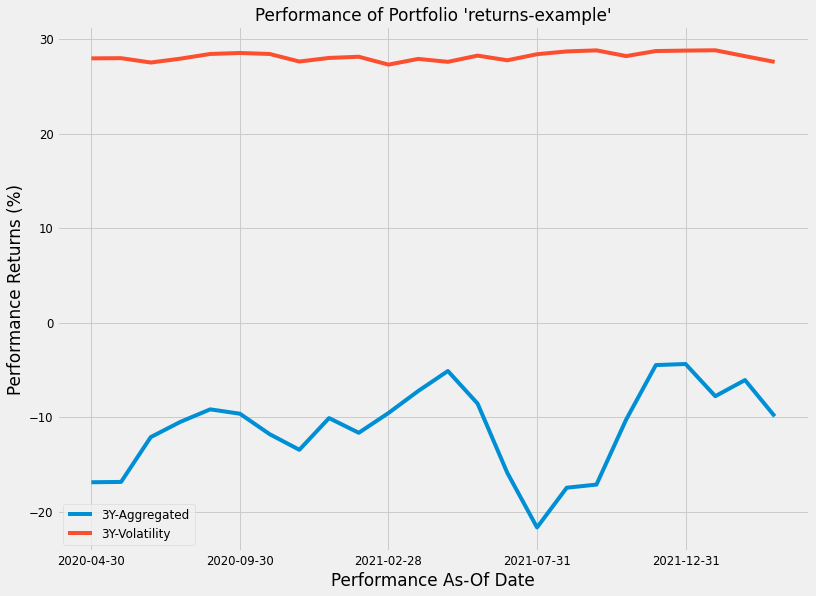

In [13]:
def plot_time_series_performance():
    concated_df = pd.concat(
        [
            aggregated_returns_summary_df,
            volatility_returns_summary_df
        ],
        axis=1
    )
    
    ts_performance=concated_df.plot(
        figsize=(12, 9))

    ts_performance.set_title(
        f"Performance of Portfolio '{portfolio_code}'",
        fontsize="large",
    )
    ts_performance.set_ylabel(f"Performance Returns (%)", fontsize="large")
    ts_performance.set_xlabel("Performance As-Of Date", fontsize="large")
    ts_performance.legend(prop={"size": 12})

plot_time_series_performance()

## 7. Data Cleanup

In [14]:
try:
    portfolios_api.delete_portfolio(
        scope=scope,
        code=portfolio_code)
    display(f"Portfolio {portfolio_code} in scope {scope} deleted.")
    
except ApiException as e: 
    if json.loads(e.body)["name"] == "PortfolioNotFound":
        display(f"Portfolio {portfolio_code} in scope {scope} already deleted.")

'Portfolio returns-example in scope aggregated-returns deleted.'